In [185]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [186]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')


In [187]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [188]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [189]:
movies['revenue']

0       2787965087
1        961000000
2        880674609
3       1084939099
4        284139100
           ...    
4798       2040920
4799             0
4800             0
4801             0
4802             0
Name: revenue, Length: 4803, dtype: int64

In [190]:
movies = movies.merge(credits, on='title')


In [191]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

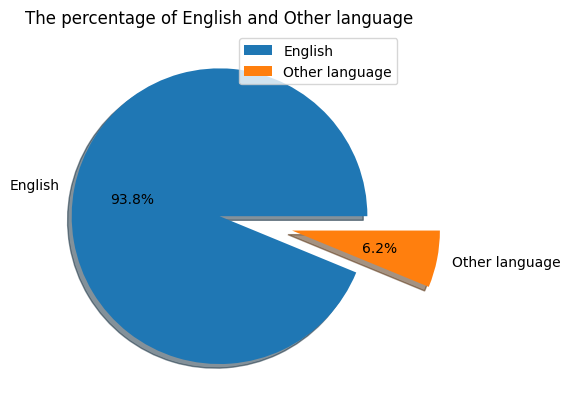

In [192]:
x=movies.shape[0]
movie = movies.drop(movies.index[movies['original_language']=='en'])
y = movie.shape[0]
x=x-y
p = np.array([x,y])
y=['English','Other language']
myexplode=[0,0.5]
plt.pie(p,labels=y,explode=myexplode,shadow=True,autopct='%1.1f%%')
plt.legend()
plt.title('The percentage of English and Other language')
plt.show()

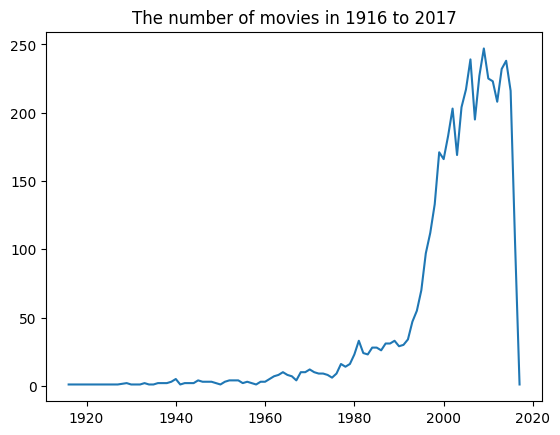

In [193]:
movies['year'] = pd.DatetimeIndex(movies['release_date']).year
p=movies['year'].unique()
p.sort()
x=p[0:90]
y = movies['year'].value_counts().sort_index()
plt.subplot(1, 1, 1)
plt.plot(x,y)
plt.title('The number of movies in 1916 to 2017')
plt.show()

In [201]:
movies['runtime'].sort_values().unique()

array([  0.,  14.,  25.,  41.,  42.,  46.,  47.,  53.,  59.,  60.,  63.,
        64.,  66.,  67.,  68.,  69.,  70.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
       154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
       165., 166., 167., 169., 170., 171., 172., 173., 174., 175., 176.,
       177., 178., 179., 180., 181., 183., 184., 185., 186., 187., 188.,
       189., 191., 192., 193., 194., 195., 197., 199., 200., 201., 202.,
       207., 214., 216., 219., 225., 229., 238., 24

In [202]:
print(movies['runtime'].max())
print(movies['runtime'].min())

338.0
0.0


In [203]:
movies['avg_runtime']=pd.cut(movies['runtime'],[0,30,60,90,120,150,180,210,240,270,300,330,360],labels=['0-30','30-60','60-90','90-120','120-150','150-180','180-210','210-240','240-270','270-300','300-330','330-360'])


In [204]:
movies.groupby([movies['avg_runtime']]).count()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,year
avg_runtime,,,,,,,,,,,,,,,,,,,,,
0-30,2,2,0,2,2,2,2,2,2,2,...,2,2,1,2,2,2,2,2,2,2
30-60,7,7,1,7,7,7,7,7,7,7,...,7,7,2,7,7,7,7,7,7,7
60-90,824,824,264,824,824,824,824,823,824,824,...,824,824,616,824,824,824,824,824,824,824
90-120,2949,2949,1047,2949,2949,2949,2949,2949,2949,2949,...,2949,2949,2483,2949,2949,2949,2949,2949,2949,2949
120-150,819,819,343,819,819,819,819,819,819,819,...,819,819,715,819,819,819,819,819,819,819
150-180,127,127,47,127,127,127,127,127,127,127,...,127,127,108,127,127,127,127,127,127,127
180-210,32,32,6,32,32,32,32,32,32,32,...,32,32,26,32,32,32,32,32,32,32
210-240,7,7,0,7,7,7,7,7,7,7,...,7,7,5,7,7,7,7,7,7,7
240-270,3,3,0,3,3,3,3,3,3,3,...,3,3,1,3,3,3,3,3,3,3


In [143]:
movies['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4804                                 El Mariachi
4805                                   Newlyweds
4806                   Signed, Sealed, Delivered
4807                            Shanghai Calling
4808                           My Date with Drew
Name: title, Length: 4809, dtype: object

In [144]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,year
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000,4808.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429,2002.457363
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849,12.424628
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000,1916.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000,1999.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000,2005.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000,2011.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000,2017.000000


In [145]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew', 'year'],
      dtype='object')

In [146]:
movies = movies[['id', 'title', 'overview','genres', 'keywords', 'cast', 'crew']]


In [147]:
import ast


In [148]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L


In [149]:
movies.shape

(4809, 7)

In [150]:
movies.dropna(inplace=True)

In [151]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [152]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()


,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [153]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()


,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [154]:
import ast
ast.literal_eval(
    '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')


[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [155]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter += 1
    return L


In [156]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()


,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [157]:
movies['cast'] = movies['cast'].apply(lambda x: x[0:3])


In [158]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L


In [159]:
movies['crew'] = movies['crew'].apply(fetch_director)


In [160]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(5)


,id,title,overview,genres,keywords,cast,crew
3995,13025,Diary of the Dead,A group of young film students run into real-l...,"[Horror, Action, Science Fiction]","[zombie, found footage]","[Michelle Morgan, Joshua Close, Shawn Roberts]",[George A. Romero]
1603,307081,Southpaw,"Billy ""The Great"" Hope, the reigning junior mi...","[Action, Drama]",[sport],"[Jake Gyllenhaal, Rachel McAdams, Forest Whita...",[Antoine Fuqua]
3921,821,Judgment at Nuremberg,"In 1947, four German judges who served on the ...","[Drama, History]","[judge, concentration camp, world war ii, nazi...","[Spencer Tracy, Burt Lancaster, Richard Widmark]",[Stanley Kramer]
3394,31535,Chairman of the Board,A surfer becomes the head of a major company.,[Comedy],"[inventor, invention, scandal]","[Scott 'Carrot Top' Thompson, Courtney Thorne-...",[Alex Zamm]
1142,46528,The Warrior's Way,An Asian assassin (Dong-gun Jang) is forced to...,"[Adventure, Fantasy, Action, Western, Thriller]","[assassin, small town, forest, revenge, decept...","[Kate Bosworth, Jang Dong-gun, Geoffrey Rush]",[Sngmoo Lee]


In [161]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ", ""))
    return L1


In [162]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)


In [163]:
movies.head()


,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [164]:
x = movies[['id', 'title', 'overview','genres', 'cast']].values
x[:1]

array([[19995, 'Avatar',
        'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
        list(['Action', 'Adventure', 'Fantasy', 'ScienceFiction']),
        list(['SamWorthington', 'ZoeSaldana', 'SigourneyWeaver'])]],
      dtype=object)

In [184]:
y = movies['id'].values
y[:5]

array([ 19995,    285, 206647,  49026,  49529], dtype=int64)

In [165]:
movies['overview'] = movies['overview'].apply(lambda x: x.split())


In [166]:
movies['tags'] = movies['overview'] + movies['genres'] + \
    movies['keywords'] + movies['cast'] + movies['crew']


In [167]:
new = movies.drop(columns=['overview', 'genres', 'keywords', 'cast', 'crew'])
# new.head()


In [168]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()


,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [169]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')


In [170]:
vector = cv.fit_transform(new['tags']).toarray()


In [171]:
vector.shape


(4806, 5000)

In [172]:
from sklearn.metrics.pairwise import cosine_similarity


In [173]:
similarity = cosine_similarity(vector)


In [174]:
similarity


array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [175]:
new[new['title'] == 'The Lego Movie'].index[0]


744

In [176]:
new['title'] = new['title'].apply(lambda x: x.lower())


In [177]:
def recommend(movie_name):
    movie = movie_name.lower()
    index = new[new['title'] == movie].index[0]
    distances = sorted(
        list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)


In [178]:
recommend('gandhi')


gandhi, my father
the wind that shakes the barley
a passage to india
guiana 1838
ramanujan


In [179]:
import pickle


In [180]:
pickle.dump(new, open('movie_list.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))
